In [38]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint


In [39]:
movie_1 = pd.read_csv("final_movie_dataset.csv")

In [40]:
movie_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            20088 non-null  float64
 1   imdb_id            20088 non-null  object 
 2   original_title     20088 non-null  object 
 3   release_date       20088 non-null  object 
 4   runtime            20088 non-null  float64
 5   title              20088 non-null  object 
 6   budget             20088 non-null  float64
 7   revenue            20088 non-null  float64
 8   popularity         20088 non-null  float64
 9   vote_average       20088 non-null  float64
 10  vote_count         20088 non-null  float64
 11  director           20088 non-null  object 
 12  prod_comp_encoded  20088 non-null  float64
 13  0                  20088 non-null  float64
 14  1                  20088 non-null  float64
 15  2                  20088 non-null  float64
 16  3                  200

# Remove column that are not numerical

In [41]:
movie_1.drop(columns=["imdb_id","director","original_title","title","release_date"], inplace=True)

# Setting aside target variable and features

In [42]:
X = movie_1.drop(columns=["revenue"])  
y = movie_1["revenue"]

# Splitting Dataset into Training and Test Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Finding the Best Parameters and then training the random forest model

In [44]:
param_dist = {'n_estimators': randint(20,200),
              'max_depth': randint(1,15)}

# Create a random forest classifier
rf = RandomForestRegressor()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021189B1C7C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000211969ABDF0>})

# Identifying the best parameters

In [45]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 88}


# Making Predictions 

In [46]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# knn = KNeighborsClassifier(n_neighbors=5)
# Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Mean Absolute Error 
- Measures the average absolute difference between predicted and actual values.

- Lower is better.

In [47]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 16416861.882079048


# Mean Squared Error
 - Used to penalize any errors that arise in prediction more efficiently than Mean Absolute Error

In [48]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1912785395937863.0000


# Root Mean Squared Error
- Square root of Mean square error

In [50]:
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 43735402.0896


#  R-squared (R² Score)
- Measures how well the model explains variance in the data.

- Closer to 1 is better.

In [51]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.8005


# Display the Importances of the different features of the dataset

<Axes: >

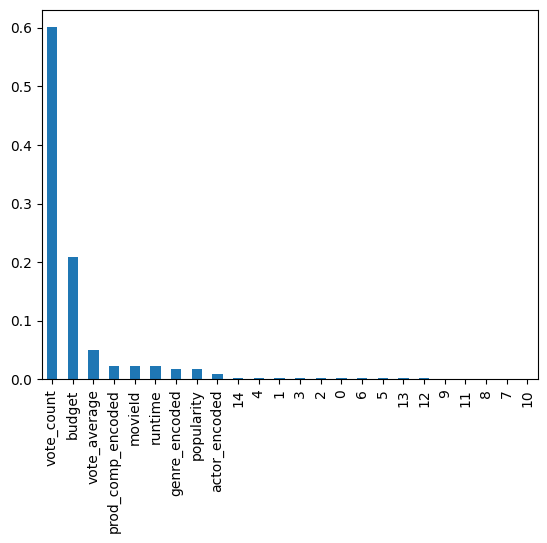

In [52]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()